# OECD International Students' Analysis using Python/Jupyter Notebook

## Import initial packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load datasets

In [2]:
intl_students_df = pd.read_csv('../../01_DataSources/02_Cleaned/Intl_Student_Origin_2013_2019.csv')
wdi_df = pd.read_csv('../../01_DataSources/01_Raw/02_WORLD_BANK/WORLD_BANK_SELECTED_WDI_2013_2019.csv')

## Preparation/Cleaning

### International Students' Origin

In [3]:
intl_students_df.head()

,COUNTRY_OF_ORIGIN,ORIGIN_COUNTRY_CODE,YEAR,TOTAL_INT_STUDENTS
0,New Zealand,NZL,2013,10392
1,Palau,PLW,2013,78
2,Slovakia,SVK,2013,65818
3,Latvia,LVA,2016,10953
4,Cuba,CUB,2013,2789


In [4]:
intl_students_df.dtypes

COUNTRY_OF_ORIGIN      object
ORIGIN_COUNTRY_CODE    object
YEAR                    int64
TOTAL_INT_STUDENTS      int64
dtype: object

In [5]:
intl_students_df.rename(columns={'ORIGIN_COUNTRY_CODE':'COUNTRY_CODE', 'TOTAL_INT_STUDENTS':'TOTAL_INTL_STUDENTS'}, inplace=True)

### World Bank World Development Indicators

In [6]:
wdi_df.head()

,COUNTRY,COUNTRY_CODE,SERIES_NAME,SERIES_CODE,YEAR,VALUE
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,2013,20146404996
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,2014,20497126770
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,2015,19134211764
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,2016,18116562465
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,2017,18753469630


In [7]:
wdi_df.dtypes

COUNTRY         object
COUNTRY_CODE    object
SERIES_NAME     object
SERIES_CODE     object
YEAR             int64
VALUE           object
dtype: object

In [8]:
set(wdi_df.SERIES_CODE)

{'EN.POP.DNST',
 'NY.GDP.MKTP.CD',
 'NY.GDP.MKTP.KD.ZG',
 'NY.GDP.PCAP.CD',
 'NY.GDP.PCAP.KD.ZG',
 'SE.XPD.CTER.ZS',
 'SE.XPD.TERT.PC.ZS',
 'SE.XPD.TERT.ZS',
 'SL.UEM.ADVN.ZS',
 'SP.POP.GROW',
 'SP.POP.TOTL',
 'SP.RUR.TOTL.ZG',
 'SP.URB.GROW'}

#### Indicator Table

| Indicator Code | Description |
| --- | --- |
| NY.GDP.MKTP.KD.ZG| GDP growth (annual %) |
| NY.GDP.PCAP.CD| GDP per capita (current USD) |
| NY.GDP.MKTP.CD | GDP (current USD) |
| SP.POP.TOTL | Population, total |
| SE.XPD.CTER.ZS | Current education expenditure, tertiary (% of total expenditure in tertiary public institutions) |
| SE.XPD.TERT.PC.ZS| Government expenditure per student, tertiary (% of GDP per capita) |
| SE.XPD.TERT.ZS | Expenditure on tertiary education (% of government expenditure on education) |
| EN.POP.DNST | Population density (people per sq. km of land area) |
| SL.UEM.ADVN.ZS | Unemployment with advanced education (% of total labor force with advanced education) |
| SP.POP.GROW | Population growth (annual %) |
| SP.URB.GROW | Urban population growth (annual %) |
| NY.GDP.PCAP.KD.ZG| GDP per capita growth (annual %) |
| SP.RUR.TOTL.ZG | Rural population growth (annual %) |

#### EN.POP.DNST - Population density (people per sq. km of land area) 

In [9]:
EN_POP_DNST_df = wdi_df.copy()
EN_POP_DNST_df = EN_POP_DNST_df[EN_POP_DNST_df['SERIES_CODE']=='EN.POP.DNST']\
                 .replace(r'\.\.',np.nan,regex=True).dropna().astype({'VALUE':'float'})
EN_POP_DNST_df.rename(columns={'VALUE':'EN.POP.DNST'}, inplace=True)
EN_POP_DNST_df.drop(['COUNTRY', 'SERIES_NAME', 'SERIES_CODE'],axis=1,inplace=True)
EN_POP_DNST_df.shape

(1853, 3)

#### NY.GDP.MKTP.CD - GDP (current USD)

In [10]:
NY_GDP_MKTP_CD_df = wdi_df.copy()
NY_GDP_MKTP_CD_df = NY_GDP_MKTP_CD_df[NY_GDP_MKTP_CD_df['SERIES_CODE']=='NY.GDP.MKTP.CD']\
                    .replace(r'\.\.',np.nan,regex=True).dropna().astype({'VALUE':'float'})
NY_GDP_MKTP_CD_df.rename(columns={'VALUE':'NY.GDP.MKTP.CD'}, inplace=True)
NY_GDP_MKTP_CD_df.drop(['COUNTRY', 'SERIES_NAME', 'SERIES_CODE'],axis=1,inplace=True)
NY_GDP_MKTP_CD_df.shape

(1794, 3)

#### NY.GDP.MKTP.KD.ZG - GDP growth (annual %)

In [11]:
NY_GDP_MKTP_KD_ZG_df = wdi_df.copy()
NY_GDP_MKTP_KD_ZG_df = NY_GDP_MKTP_KD_ZG_df[NY_GDP_MKTP_KD_ZG_df['SERIES_CODE']=='NY.GDP.MKTP.KD.ZG']\
                       .replace(r'\.\.',np.nan,regex=True).dropna().astype({'VALUE':'float'})
NY_GDP_MKTP_KD_ZG_df.rename(columns={'VALUE':'NY.GDP.MKTP.KD.ZG'}, inplace=True)
NY_GDP_MKTP_KD_ZG_df.drop(['COUNTRY', 'SERIES_NAME', 'SERIES_CODE'],axis=1,inplace=True)
NY_GDP_MKTP_KD_ZG_df.shape

(1774, 3)

#### NY.GDP.PCAP.CD - GDP per capita (current USD)

In [12]:
NY_GDP_PCAP_CD_df = wdi_df.copy()
NY_GDP_PCAP_CD_df = NY_GDP_PCAP_CD_df[NY_GDP_PCAP_CD_df['SERIES_CODE']=='NY.GDP.PCAP.CD']\
                    .replace(r'\.\.',np.nan,regex=True).dropna().astype({'VALUE':'float'})
NY_GDP_PCAP_CD_df.rename(columns={'VALUE':'NY.GDP.PCAP.CD'}, inplace=True)
NY_GDP_PCAP_CD_df.drop(['COUNTRY', 'SERIES_NAME', 'SERIES_CODE'],axis=1,inplace=True)
NY_GDP_PCAP_CD_df.shape

(1794, 3)

#### NY.GDP.PCAP.KD.ZG - GDP per capita growth (annual %)

In [13]:
NY_GDP_PCAP_KD_ZG_df = wdi_df.copy()
NY_GDP_PCAP_KD_ZG_df = NY_GDP_PCAP_KD_ZG_df[NY_GDP_PCAP_KD_ZG_df['SERIES_CODE']=='NY.GDP.PCAP.KD.ZG']\
                       .replace(r'\.\.',np.nan,regex=True).dropna().astype({'VALUE':'float'})
NY_GDP_PCAP_KD_ZG_df.rename(columns={'VALUE':'NY.GDP.PCAP.KD.ZG'}, inplace=True)
NY_GDP_PCAP_KD_ZG_df.drop(['COUNTRY', 'SERIES_NAME', 'SERIES_CODE'],axis=1,inplace=True)
NY_GDP_PCAP_KD_ZG_df.shape

(1774, 3)

#### SE.XPD.CTER.ZS - Current education expenditure, tertiary (% of total expenditure in tertiary public institutions)

In [14]:
SE_XPD_CTER_ZS_df = wdi_df.copy()
SE_XPD_CTER_ZS_df = SE_XPD_CTER_ZS_df[SE_XPD_CTER_ZS_df['SERIES_CODE']=='SE.XPD.CTER.ZS']\
                    .replace(r'\.\.',np.nan,regex=True).dropna().astype({'VALUE':'float'})
SE_XPD_CTER_ZS_df.rename(columns={'VALUE':'SE.XPD.CTER.ZS'}, inplace=True)
SE_XPD_CTER_ZS_df.drop(['COUNTRY', 'SERIES_NAME', 'SERIES_CODE'],axis=1,inplace=True)
SE_XPD_CTER_ZS_df.shape

(606, 3)

#### SE.XPD.TERT.PC.ZS - Government expenditure per student, tertiary (% of GDP per capita)

In [15]:
SE_XPD_TERT_PC_ZS_df = wdi_df.copy()
SE_XPD_TERT_PC_ZS_df = SE_XPD_TERT_PC_ZS_df[SE_XPD_TERT_PC_ZS_df['SERIES_CODE']=='SE.XPD.TERT.PC.ZS']\
                       .replace(r'\.\.',np.nan,regex=True).dropna().astype({'VALUE':'float'})
SE_XPD_TERT_PC_ZS_df.rename(columns={'VALUE':'SE.XPD.TERT.PC.ZS'}, inplace=True)
SE_XPD_TERT_PC_ZS_df.drop(['COUNTRY', 'SERIES_NAME', 'SERIES_CODE'],axis=1,inplace=True)
SE_XPD_TERT_PC_ZS_df.shape

(460, 3)

#### SE.XPD.TERT.ZS - Expenditure on tertiary education (% of government expenditure on education)

In [16]:
SE_XPD_TERT_ZS_df = wdi_df.copy()
SE_XPD_TERT_ZS_df = SE_XPD_TERT_ZS_df[SE_XPD_TERT_ZS_df['SERIES_CODE']=='SE.XPD.TERT.ZS']\
                    .replace(r'\.\.',np.nan,regex=True).dropna().astype({'VALUE':'float'})
SE_XPD_TERT_ZS_df.rename(columns={'VALUE':'SE.XPD.TERT.ZS'}, inplace=True)
SE_XPD_TERT_ZS_df.drop(['COUNTRY', 'SERIES_NAME', 'SERIES_CODE'],axis=1,inplace=True)
SE_XPD_TERT_ZS_df.shape

(536, 3)

#### SL.UEM.ADVN.ZS - Unemployment with advanced education (% of total labor force with advanced education)

In [17]:
SL_UEM_ADVN_ZS_df = wdi_df.copy()
SL_UEM_ADVN_ZS_df = SL_UEM_ADVN_ZS_df[SL_UEM_ADVN_ZS_df['SERIES_CODE']=='SL.UEM.ADVN.ZS']\
                    .replace(r'\.\.',np.nan,regex=True).dropna().astype({'VALUE':'float'})
SL_UEM_ADVN_ZS_df.rename(columns={'VALUE':'SL.UEM.ADVN.ZS'}, inplace=True)
SL_UEM_ADVN_ZS_df.drop(['COUNTRY', 'SERIES_NAME', 'SERIES_CODE'],axis=1,inplace=True)
SL_UEM_ADVN_ZS_df.shape

(844, 3)

#### SP.POP.GROW - Population growth (annual %)

In [18]:
SP_POP_GROW_df = wdi_df.copy()
SP_POP_GROW_df = SP_POP_GROW_df[SP_POP_GROW_df['SERIES_CODE']=='SP.POP.GROW']\
                 .replace(r'\.\.',np.nan,regex=True).dropna().astype({'VALUE':'float'})
SP_POP_GROW_df.rename(columns={'VALUE':'SP.POP.GROW'}, inplace=True)
SP_POP_GROW_df.drop(['COUNTRY', 'SERIES_NAME', 'SERIES_CODE'],axis=1,inplace=True)
SP_POP_GROW_df.shape

(1848, 3)

#### SP.POP.TOTL - Population, total

In [19]:
SP_POP_TOTL_df = wdi_df.copy()
SP_POP_TOTL_df = SP_POP_TOTL_df[SP_POP_TOTL_df['SERIES_CODE']=='SP.POP.TOTL']\
                 .replace(r'\.\.',np.nan,regex=True).dropna().astype({'VALUE':'int64'})
SP_POP_TOTL_df.rename(columns={'VALUE':'SP.POP.TOTL'}, inplace=True)
SP_POP_TOTL_df.drop(['COUNTRY', 'SERIES_NAME', 'SERIES_CODE'],axis=1,inplace=True)
SP_POP_TOTL_df.shape

(1848, 3)

#### SP.RUR.TOTL.ZG | Rural population growth (annual %)

In [20]:
SP_RUR_TOTL_ZG_df = wdi_df.copy()
SP_RUR_TOTL_ZG_df = SP_RUR_TOTL_ZG_df[SP_RUR_TOTL_ZG_df['SERIES_CODE']=='SP.RUR.TOTL.ZG']\
                    .replace(r'\.\.',np.nan,regex=True).dropna().astype({'VALUE':'float'})
SP_RUR_TOTL_ZG_df.rename(columns={'VALUE':'SP.RUR.TOTL.ZG'}, inplace=True)
SP_RUR_TOTL_ZG_df.drop(['COUNTRY', 'SERIES_NAME', 'SERIES_CODE'],axis=1,inplace=True)
SP_RUR_TOTL_ZG_df.shape

(1764, 3)

#### SP.URB.GROW - Urban population growth (annual %)

In [21]:
SP_URB_GROW_df = wdi_df.copy()
SP_URB_GROW_df = SP_URB_GROW_df[SP_URB_GROW_df['SERIES_CODE']=='SP.URB.GROW']\
                 .replace(r'\.\.',np.nan,regex=True).dropna().astype({'VALUE':'float'})
SP_URB_GROW_df.rename(columns={'VALUE':'SP.URB.GROW'}, inplace=True)
SP_URB_GROW_df.drop(['COUNTRY', 'SERIES_NAME', 'SERIES_CODE'],axis=1,inplace=True)
SP_URB_GROW_df.shape

(1834, 3)

In [22]:
'''
resdf = intl_students_df.merge(EN_POP_DNST_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        .merge(NY_GDP_MKTP_CD_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        .merge(NY_GDP_MKTP_KD_ZG_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        .merge(NY_GDP_PCAP_CD_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        .merge(NY_GDP_PCAP_KD_ZG_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        #.merge(SE_XPD_CTER_ZS_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        #.merge(SE_XPD_TERT_PC_ZS_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        #.merge(SE_XPD_TERT_ZS_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        #.merge(SL_UEM_ADVN_ZS_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        .merge(SP_POP_GROW_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        .merge(SP_POP_TOTL_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        .merge(SP_RUR_TOTL_ZG_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        .merge(SP_URB_GROW_df, how='left', on=['COUNTRY_CODE', 'YEAR'])
'''

"\nresdf = intl_students_df.merge(EN_POP_DNST_df, how='left', on=['COUNTRY_CODE', 'YEAR'])        .merge(NY_GDP_MKTP_CD_df, how='left', on=['COUNTRY_CODE', 'YEAR'])        .merge(NY_GDP_MKTP_KD_ZG_df, how='left', on=['COUNTRY_CODE', 'YEAR'])        .merge(NY_GDP_PCAP_CD_df, how='left', on=['COUNTRY_CODE', 'YEAR'])        .merge(NY_GDP_PCAP_KD_ZG_df, how='left', on=['COUNTRY_CODE', 'YEAR'])        #.merge(SE_XPD_CTER_ZS_df, how='left', on=['COUNTRY_CODE', 'YEAR'])        #.merge(SE_XPD_TERT_PC_ZS_df, how='left', on=['COUNTRY_CODE', 'YEAR'])        #.merge(SE_XPD_TERT_ZS_df, how='left', on=['COUNTRY_CODE', 'YEAR'])        #.merge(SL_UEM_ADVN_ZS_df, how='left', on=['COUNTRY_CODE', 'YEAR'])        .merge(SP_POP_GROW_df, how='left', on=['COUNTRY_CODE', 'YEAR'])        .merge(SP_POP_TOTL_df, how='left', on=['COUNTRY_CODE', 'YEAR'])        .merge(SP_RUR_TOTL_ZG_df, how='left', on=['COUNTRY_CODE', 'YEAR'])        .merge(SP_URB_GROW_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\n"

Based on the features extracted from the World Bank Databank, unfortunately, 4 features was chosen to be removed because there are to few non-NaN records remaining:

SE.XPD.CTER.ZS
SE.XPD.TERT.PC.ZS
SE.XPD.TERT.ZS
SL.UEM.ADVN.ZS

These are related to Education and Unemployment and it seems they have incomplete data in terms of the time period of 2013-2019 and of some countries

Another option moving forward maybe to impute those NaN records with the mean/median of the series.

In [23]:
resdf = intl_students_df.merge(EN_POP_DNST_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        .merge(NY_GDP_MKTP_CD_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        .merge(NY_GDP_MKTP_KD_ZG_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        .merge(NY_GDP_PCAP_CD_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        .merge(NY_GDP_PCAP_KD_ZG_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        .merge(SP_POP_GROW_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        .merge(SP_POP_TOTL_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        .merge(SP_RUR_TOTL_ZG_df, how='left', on=['COUNTRY_CODE', 'YEAR'])\
        .merge(SP_URB_GROW_df, how='left', on=['COUNTRY_CODE', 'YEAR'])

In [24]:
resdf.head()

,COUNTRY_OF_ORIGIN,COUNTRY_CODE,YEAR,TOTAL_INTL_STUDENTS,EN.POP.DNST,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.CD,NY.GDP.PCAP.KD.ZG,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL.ZG,SP.URB.GROW
0,New Zealand,NZL,2013,10392,16.870229,1.909066e+11,2.695784,42976.64959,1.909746,0.768348,4442100.0,0.333848,0.837961
1,Palau,PLW,2013,78,38.267391,2.211172e+08,-3.387316,12561.33614,-3.211687,-0.181622,17603.0,-3.022839,0.689735
2,Slovakia,SVK,2013,65818,112.572638,9.856932e+10,0.654765,18208.41759,0.546662,0.107458,5413393.0,0.413205,-0.150800
3,Latvia,LVA,2016,10953,31.544382,2.808360e+10,2.367610,14331.75159,3.307420,-0.913885,1959537.0,-1.042043,-0.853577
4,Cuba,CUB,2013,2789,108.258703,7.714800e+10,2.747603,6837.71168,2.514382,0.227242,11282722.0,0.028919,0.287139


In [25]:
resdf.shape

(1482, 13)

In [26]:
resdf.dtypes

COUNTRY_OF_ORIGIN       object
COUNTRY_CODE            object
YEAR                     int64
TOTAL_INTL_STUDENTS      int64
EN.POP.DNST            float64
NY.GDP.MKTP.CD         float64
NY.GDP.MKTP.KD.ZG      float64
NY.GDP.PCAP.CD         float64
NY.GDP.PCAP.KD.ZG      float64
SP.POP.GROW            float64
SP.POP.TOTL            float64
SP.RUR.TOTL.ZG         float64
SP.URB.GROW            float64
dtype: object

Need to remove NaN rows as well as country, country code and year

In [27]:
#resdf.drop(['COUNTRY_OF_ORIGIN','COUNTRY_CODE','YEAR'],axis=1,inplace=True)
resdf = resdf.dropna().astype({'SP.POP.TOTL':'int64'})

In [28]:
resdf.shape

(1323, 13)

In [29]:
resdf.dtypes

COUNTRY_OF_ORIGIN       object
COUNTRY_CODE            object
YEAR                     int64
TOTAL_INTL_STUDENTS      int64
EN.POP.DNST            float64
NY.GDP.MKTP.CD         float64
NY.GDP.MKTP.KD.ZG      float64
NY.GDP.PCAP.CD         float64
NY.GDP.PCAP.KD.ZG      float64
SP.POP.GROW            float64
SP.POP.TOTL              int64
SP.RUR.TOTL.ZG         float64
SP.URB.GROW            float64
dtype: object

## Correlation Matrix

In [30]:
corrdata = resdf.corr()
corrdata

,YEAR,TOTAL_INTL_STUDENTS,EN.POP.DNST,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.CD,NY.GDP.PCAP.KD.ZG,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL.ZG,SP.URB.GROW
YEAR,1.000000,0.039545,0.017609,0.011521,0.009918,0.003837,0.018077,-0.023429,0.006886,-0.039561,-0.011586
TOTAL_INTL_STUDENTS,0.039545,1.000000,0.014146,0.574196,0.075766,0.027982,0.114604,-0.103972,0.851005,-0.151118,-0.024731
EN.POP.DNST,0.017609,0.014146,1.000000,-0.014259,0.061185,0.089346,0.032974,0.082916,0.054195,0.065446,0.048692
NY.GDP.MKTP.CD,0.011521,0.574196,-0.014259,1.000000,-0.001524,0.255522,0.040001,-0.120258,0.556573,-0.146627,-0.098193
NY.GDP.MKTP.KD.ZG,0.009918,0.075766,0.061185,-0.001524,1.000000,-0.105274,0.940562,0.224409,0.109652,0.186617,0.258526
NY.GDP.PCAP.CD,0.003837,0.027982,0.089346,0.255522,-0.105274,1.000000,-0.044186,-0.181433,-0.041845,-0.307731,-0.296967
NY.GDP.PCAP.KD.ZG,0.018077,0.114604,0.032974,0.040001,0.940562,-0.044186,1.000000,-0.117154,0.124803,-0.039113,-0.056802
SP.POP.GROW,-0.023429,-0.103972,0.082916,-0.120258,0.224409,-0.181433,-0.117154,1.000000,-0.036359,0.661508,0.925932
SP.POP.TOTL,0.006886,0.851005,0.054195,0.556573,0.109652,-0.041845,0.124803,-0.036359,1.000000,-0.075031,0.049950
SP.RUR.TOTL.ZG,-0.039561,-0.151118,0.065446,-0.146627,0.186617,-0.307731,-0.039113,0.661508,-0.075031,1.000000,0.553075


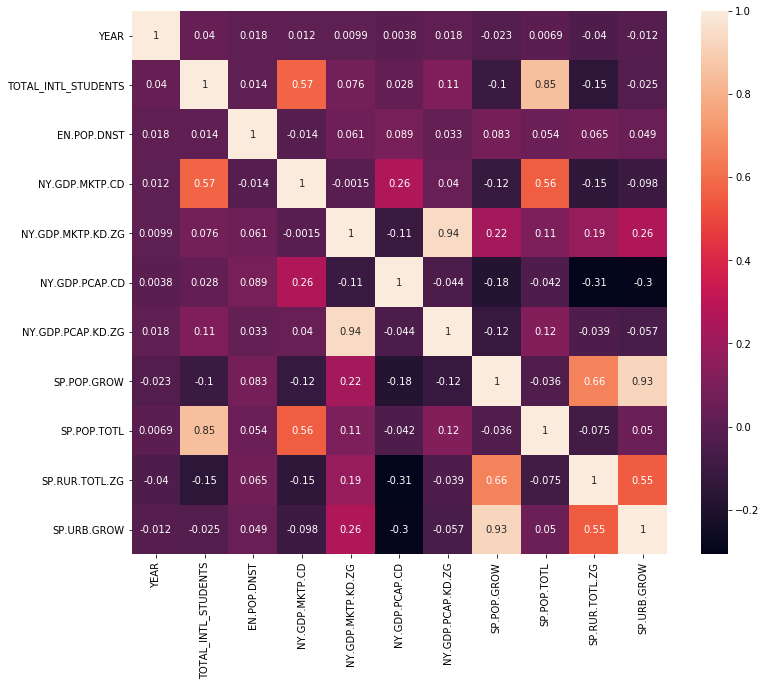

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(data=corrdata, annot=True)

Seems that there are multiple features that have almost no correlation with the number of international students.

Therefore, we might as well check with features have some correlation to international students.

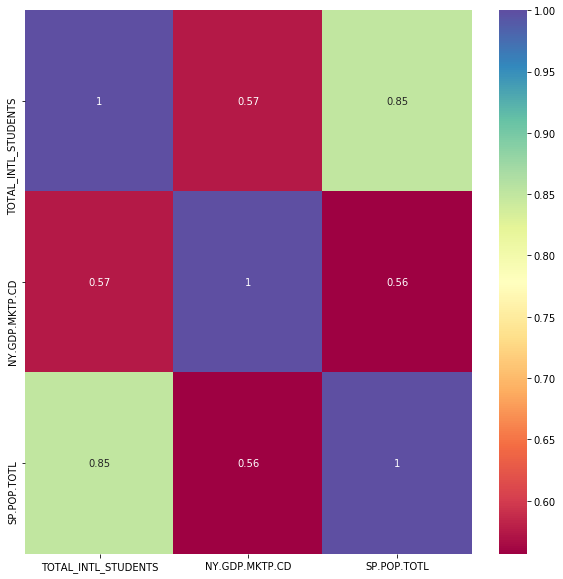

In [32]:
corrmat = resdf.corr()
top_corr_features = corrmat.index[abs(corrmat['TOTAL_INTL_STUDENTS'])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(resdf[top_corr_features].corr(),annot=True,cmap="Spectral")

Only the Total Population and annual GDP have significant to the international students.

### GDP vs International Students

Text(0, 0.5, 'Total International Students')

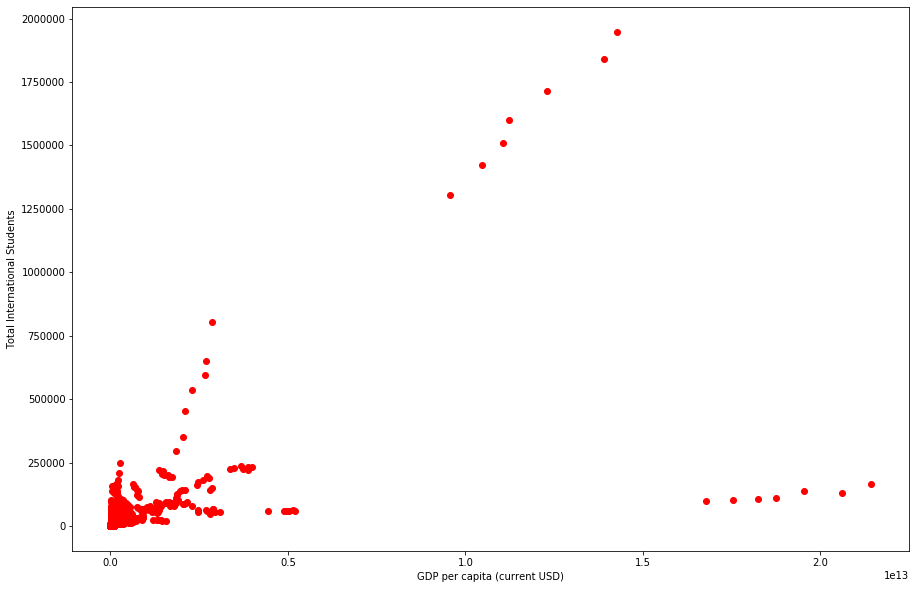

In [33]:
plt.figure(figsize=(15,10))
plt.scatter(resdf['NY.GDP.MKTP.CD'], resdf['TOTAL_INTL_STUDENTS'], c='r')
plt.xlabel('GDP per capita (current USD)')
plt.ylabel('Total International Students')

### Population vs International Students

Text(0, 0.5, 'Total International Students')

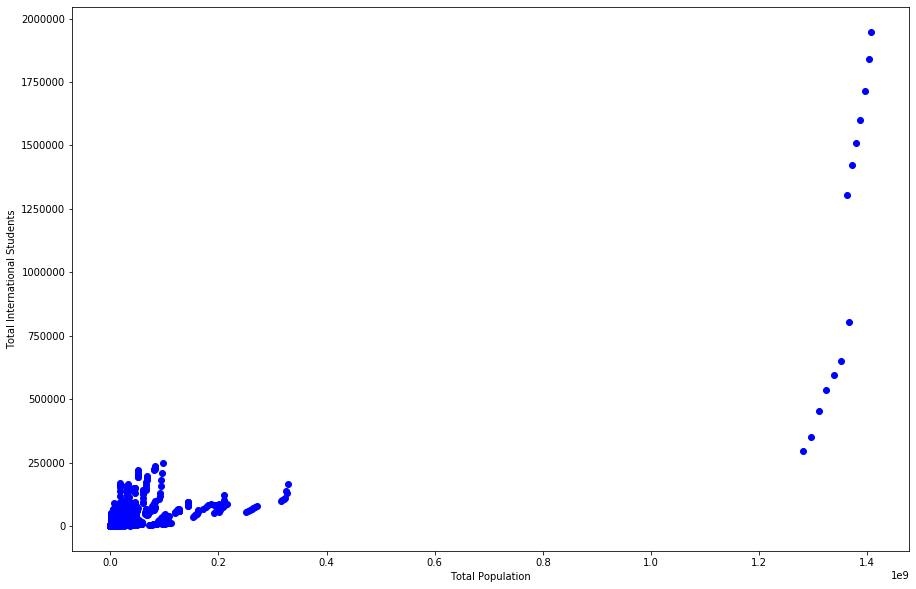

In [34]:
plt.figure(figsize=(15,10))
plt.scatter(resdf['SP.POP.TOTL'], resdf['TOTAL_INTL_STUDENTS'], c='b')
plt.xlabel('Total Population')
plt.ylabel('Total International Students')

## Modelling

Just need to remove categorical features from the dataset.  Another consideration can be to generate dummies for these but the other features may be enough to describe the country/year.

In [35]:
resdf.drop(['COUNTRY_OF_ORIGIN','COUNTRY_CODE','YEAR'],axis=1,inplace=True)

### Linear Regression

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = pd.DataFrame(np.c_[resdf['NY.GDP.MKTP.CD'],resdf['SP.POP.TOTL']], columns=['NY.GDP.MKTP.CD','SP.POP.TOTL'])
Y = resdf['TOTAL_INTL_STUDENTS']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean Squared Error:  10799025141.759243
R2 Score:  0.7539917011089103


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = resdf.copy()
X.drop(['TOTAL_INTL_STUDENTS'],axis=1,inplace=True)
Y = resdf['TOTAL_INTL_STUDENTS']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean Squared Error:  10625208629.595928
R2 Score:  0.7579513459764019


The score for using the Linear Model against the validation test (20%) is pretty modest.  As only the GDP and Population
are the only ones that have significant correlation to International Students, the model using only those 2 features have
around the same score as that of the one which also uses the other features.

### Gradient Boosting Regressor

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = pd.DataFrame(np.c_[resdf['NY.GDP.MKTP.CD'],resdf['SP.POP.TOTL']], columns=['NY.GDP.MKTP.CD','SP.POP.TOTL'])
Y = resdf['TOTAL_INTL_STUDENTS']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
clf = GradientBoostingRegressor().fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean Squared Error:  716003779.4080027
R2 Score:  0.9836890025294396


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = resdf.copy()
X.drop(['TOTAL_INTL_STUDENTS'],axis=1,inplace=True)
Y = resdf['TOTAL_INTL_STUDENTS']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
clf = GradientBoostingRegressor().fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean Squared Error:  703079243.8572266
R2 Score:  0.9839834312360187


The score is better than Linear Regression and behavior is also the same where using only GDP and Population as features for the model have the similar score to using the other features with them.

## Takeaways

As there maybe some insights found in the International Students Data against World Development Indicators, maybe additional features against this can be checked.  Aside from World Development Indicators, data relating to cultural behaviors to each country may help as those may be close to describing people in that country.

However, it does makes sense that Population and GDP does relate to International Students.  Countries that are prospering than others do have means to go abroad for whatever purpose.  On the other hand, having the fact that a countries has a large population, more people would consider international education.